## ZAD 1
### a) Sprawdź czy potrafisz uruchomić wszystkie elementarne Automaty Komórkowe zgodnie z  
https://cellpylib.org/eca.html.


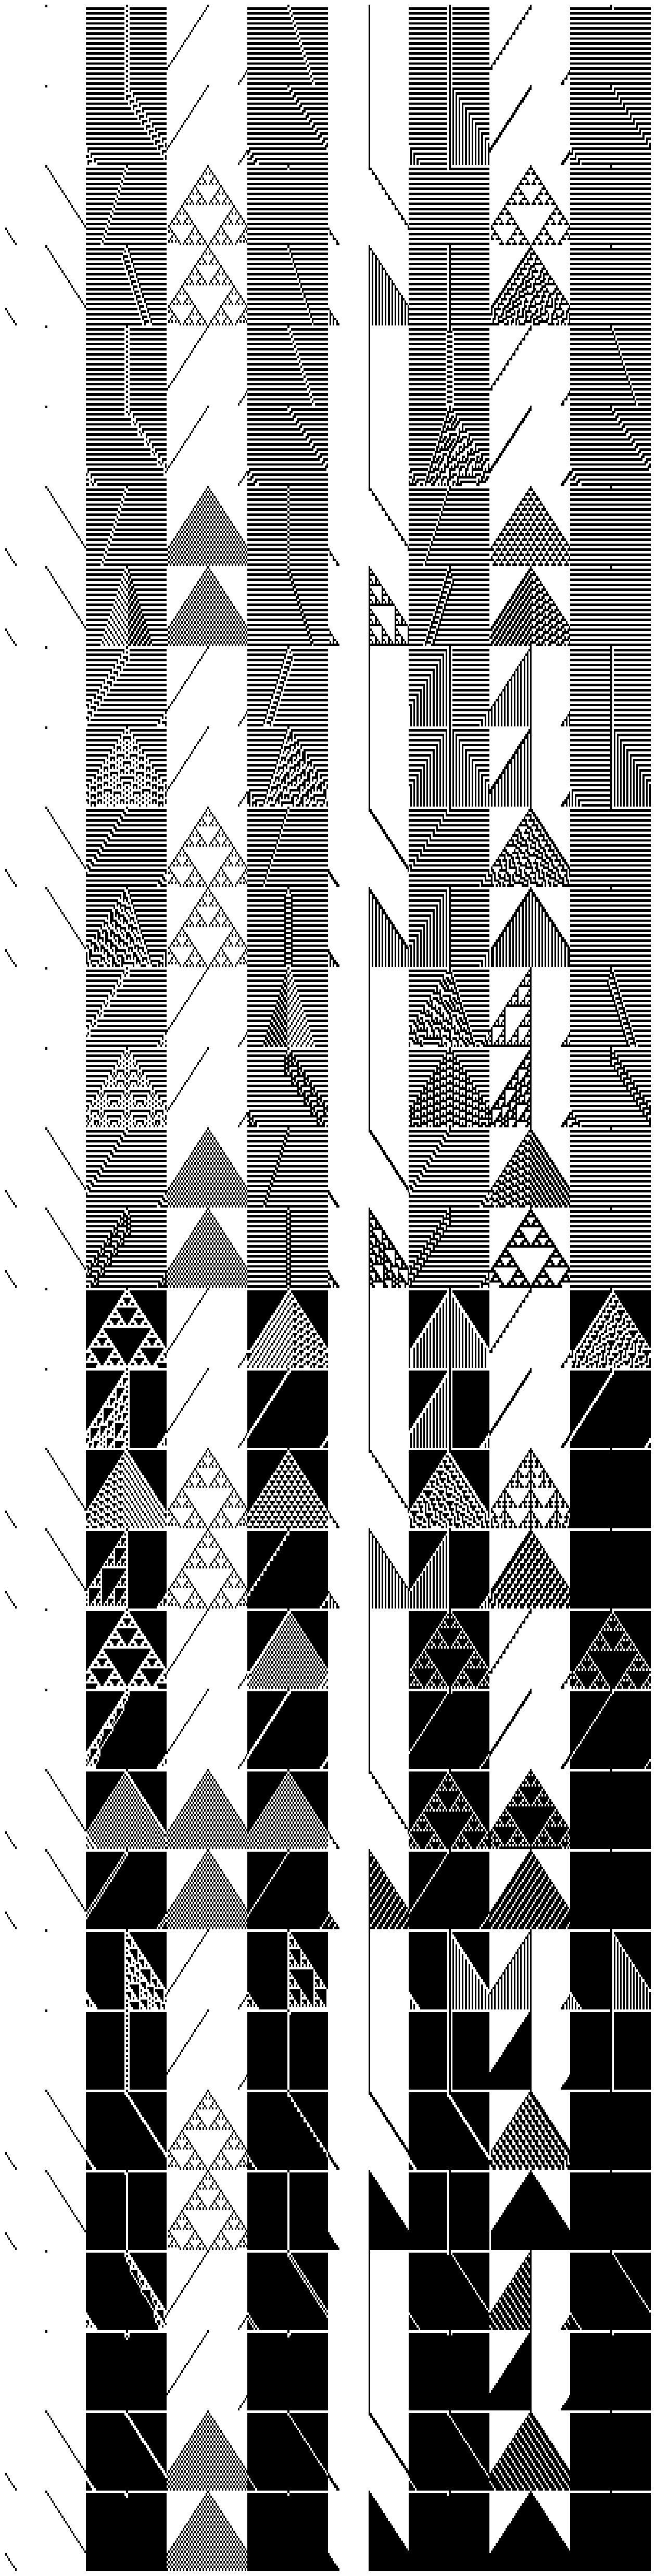

In [ ]:
import cellpylib as cpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(32, 8, figsize=(8*2, 32*2))
fig.subplots_adjust(wspace=0, hspace=0)

for i in range(256):
    cellular_automaton = cpl.init_simple(50)
    cellular_automaton = cpl.evolve(
        cellular_automaton,
        timesteps=32,
        apply_rule=lambda n, c, t: cpl.nks_rule(n, i)
    )
    ax[i // 8, i % 8].imshow(cellular_automaton, cmap="binary", aspect="auto")
    ax[i // 8, i % 8].axis("off") 

plt.show()


### b) Wybierz niebanalne automaty 30, 45, 106, 154, zwizualizuj je i policz dla nich miary złożoności zgodnie z Measures of Complexity.(Average cell entropy, Average Mutual Information).https://github.com/lantunes/cellpy lib.


### c) Wstaw dodatkowo miarę LMC


In [15]:
import cellpylib as cpl
import numpy as np

def calculate_lmc_complexity(binary_sequence):
    # Calculate the probability distribution
    unique, counts = np.unique(binary_sequence, return_counts=True)
    probabilities = counts / len(binary_sequence)
    
    # Calculate Shannon entropy (H)
    H = -np.sum(probabilities * np.log2(probabilities))
    
    # Calculate Disequilibrium (D)
    uniform_prob = 1 / len(probabilities)
    D = np.sum((probabilities - uniform_prob) ** 2)
    
    # Calculate LMC Complexity (C)
    C = H * D
    return C


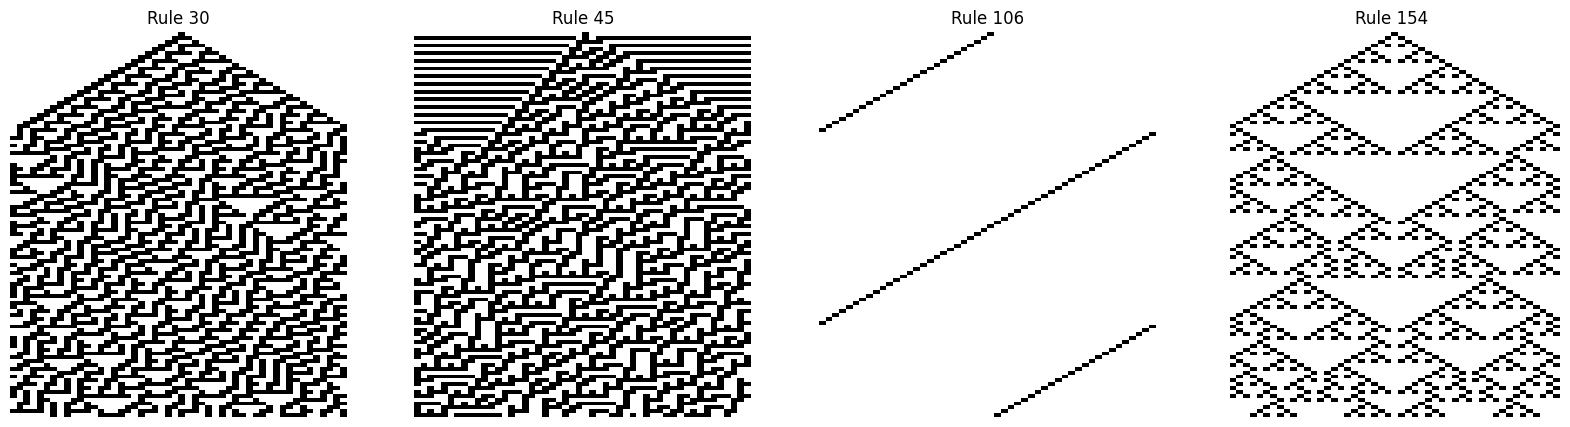

<Axes: >

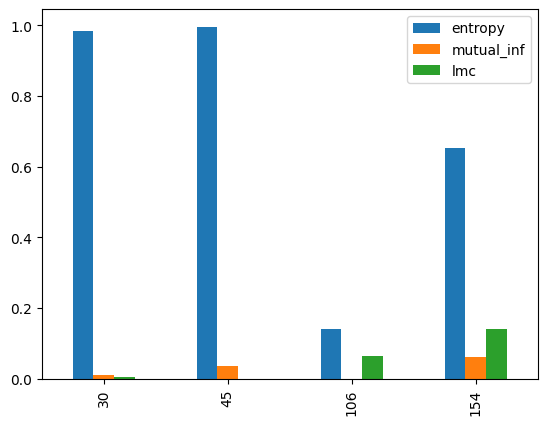

In [ ]:
import matplotlib.pyplot as plt

def evolve_compute_complexity_metrics(rule_number):
    cellular_automaton = cpl.init_simple(50)
    cellular_automaton = cpl.evolve(
        cellular_automaton,
        timesteps=100,
        apply_rule=lambda n, c, t: cpl.nks_rule(n, rule_number)
    )

    entropy = cpl.average_cell_entropy(cellular_automaton)
    mutual_inf = cpl.average_mutual_information(cellular_automaton)
    binary_sequence = cellular_automaton.flatten()
    lmc = calculate_lmc_complexity(binary_sequence)
    return cellular_automaton, entropy, mutual_inf, lmc
    
import pandas as pd
rules = [30, 45, 106, 154]
metrics = {} 

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, rule in enumerate(rules):
    out, entropy, mutual_inf, lmc = evolve_compute_complexity_metrics(rule)
    metrics[rule] = {"entropy": entropy, "mutual_inf": mutual_inf, "lmc": lmc}
    ax[i].imshow(out, cmap="binary", aspect="auto")
    ax[i].set_title(f"Rule {rule}")
    ax[i].axis("off")

plt.show()
df = pd.DataFrame.from_dict(metrics, orient="index")
df.plot(kind="bar")
    
    

Entropy:

    najwieksza dla tych na ktorych jest najwieksza ilosc rzeczy na obrazie. Z faktu ze jest to liczone punktowo, naturalnie 106 ma najmniej skomplikowany obraz

Mutual_inf:

    rozumiem, ze jest to zaleznosc komorki z komorka w nastepnym kroku.
    dla 106 jest najmniej, bo wiekszosc jest pusta, wiec tylko ulamek informacji w jednym kroku ma wplyw na kolejny

    45 jest wyzej od 30, mysle ze z powodu tych linii poizomych na poczatku, bo kazda z nich bezposrednio tworzy w kolejnej komorce zmiane stanu

    154: ciezko porownac z reszta, ale widac duza regularnosc zmian, wiec to pewnie powod

LMC:

    z mojego zrozumienia ma odpowiadac balansowi pomiedzy entropia, a strukturalizowaniem danych ( odbieganiem od rozkladu normalnego )
    30 i 45 mimo duzej entropii nie maja za wysokiej strukturyzowalnosci 

    co do 106 ciezko powiedziec jak ten balans sie objawia, bo entropia i tak jest niska. dysequlibrium chyba bedzie wysokie, bo do rozkladu normalnego jest mu totalnie daleko i prawdopodobnie to jest powod takiego wyniku

    154: wydaje sie byc takim przypadkiem najbardziej zbalansowanym, sredniej wielkosci entropia i znacznie wieksza niz 30,45 ale pewnie mniejsza niz 106 D.

### d) Zrób to dla jednego punktu startowego, dla kilku i dla większej ilości. Sformułuj wnioski.

Hipoteza:
 
 dla 106 wiecej punktow poczatkowych da wieksza entropie   
 154,30,45: nie jestem w stanie przewidziec co tam sie stanie
 

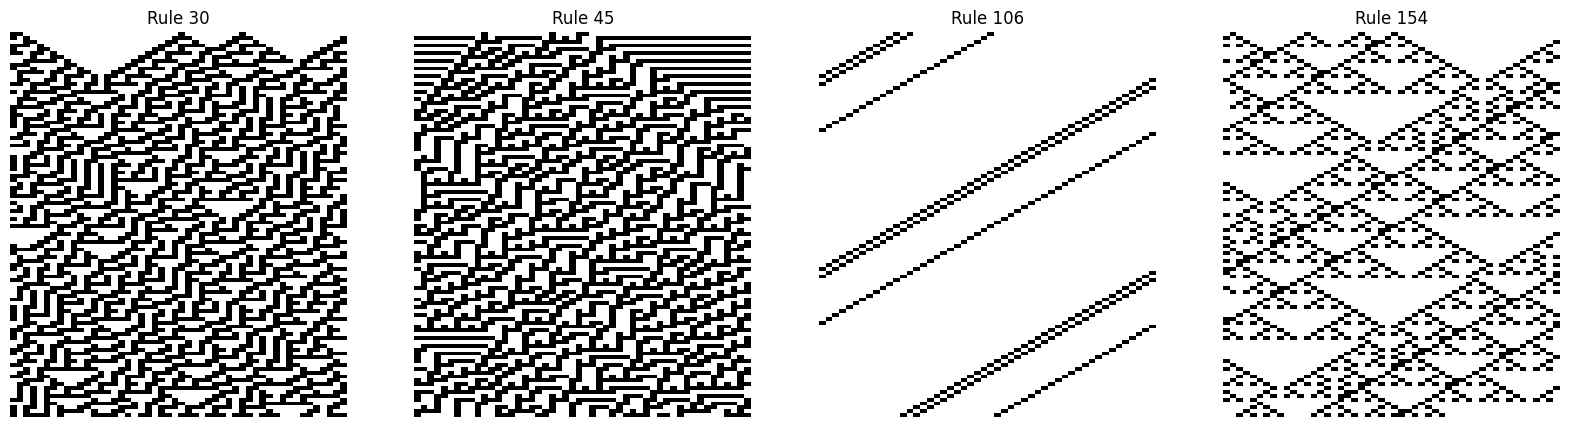

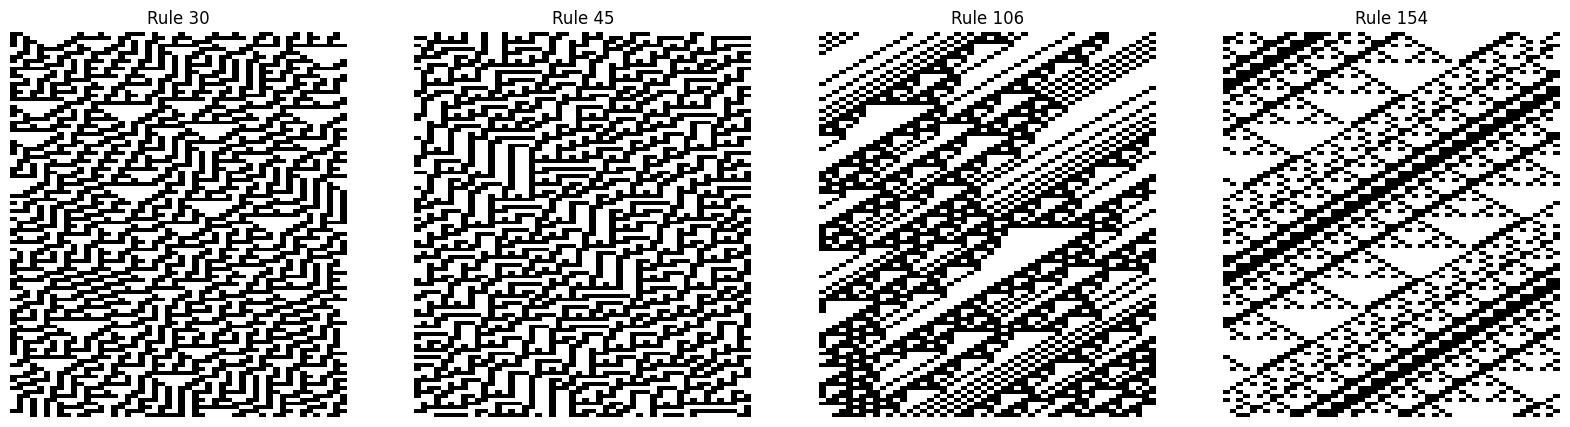

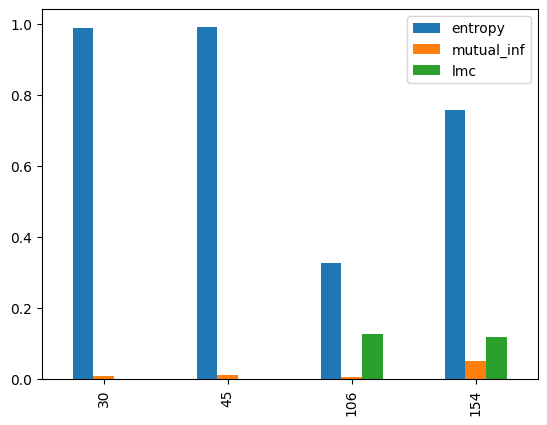

<Axes: >

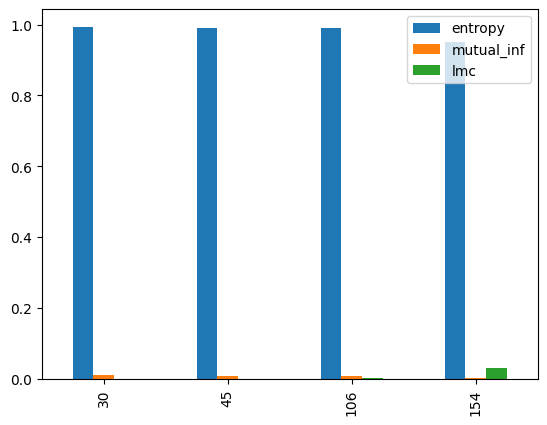

In [ ]:
def evolve_compute_complexity_metrics(rule_number, starting_points=1):
    cellular_automaton = cpl.init_simple(50)
    starting_points_idx = np.random.choice(range(50), size=starting_points, replace=False)
    cellular_automaton[0, starting_points_idx] = 1

    
    cellular_automaton = cpl.evolve(
        cellular_automaton,
        timesteps=100,
        apply_rule=lambda n, c, t: cpl.nks_rule(n, rule_number)
    )

    entropy = cpl.average_cell_entropy(cellular_automaton)
    mutual_inf = cpl.average_mutual_information(cellular_automaton)
    binary_sequence = cellular_automaton.flatten()
    lmc = calculate_lmc_complexity(binary_sequence)
    return cellular_automaton, entropy, mutual_inf, lmc
    
import pandas as pd
rules = [30, 45, 106, 154]
metrics_3 = {} 
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, rule in enumerate(rules):
    out, entropy, mutual_inf, lmc = evolve_compute_complexity_metrics(rule, 3)
    metrics_3[rule] = {"entropy": entropy, "mutual_inf": mutual_inf, "lmc": lmc}
    ax[i].imshow(out, cmap="binary", aspect="auto")
    ax[i].set_title(f"Rule {rule}")
    ax[i].axis("off")
plt.show()


metrics_15 = {}
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for i, rule in enumerate(rules):
    out, entropy, mutual_inf, lmc = evolve_compute_complexity_metrics(rule, 15)
    metrics_15[rule] = {"entropy": entropy, "mutual_inf": mutual_inf, "lmc": lmc}
    ax[i].imshow(out, cmap="binary", aspect="auto")
    ax[i].set_title(f"Rule {rule}")
    ax[i].axis("off")

plt.show()
df = pd.DataFrame.from_dict(metrics_3, orient="index")
df.plot(kind="bar")

plt.show()
df = pd.DataFrame.from_dict(metrics_15, orient="index")
df.plot(kind="bar")

entropia poszla mega wysoko w obu przypadkach,

Dla 3 punktow metryki zostaly jeszcze bardzo podobne do tego co wyszlo wczesniej.
dla 15: znaczaco wzmocniona entropia. Dla 154 mniej wiecej zachowana reszta metryk, tylko z zmniejszona amplituda

## ZADANIE. 2
### a) Przetestuj jak wygląda Langton Edge of chaos zmieniając parametr lambda dla 1-D automatu komórkowego z k stanami i n sąsiadami.
Pomoc: https://math.hws.edu/eck/js/edge-of-chaos/CA.html.
Introduction to the Edge of Chaos
(hws.edu)


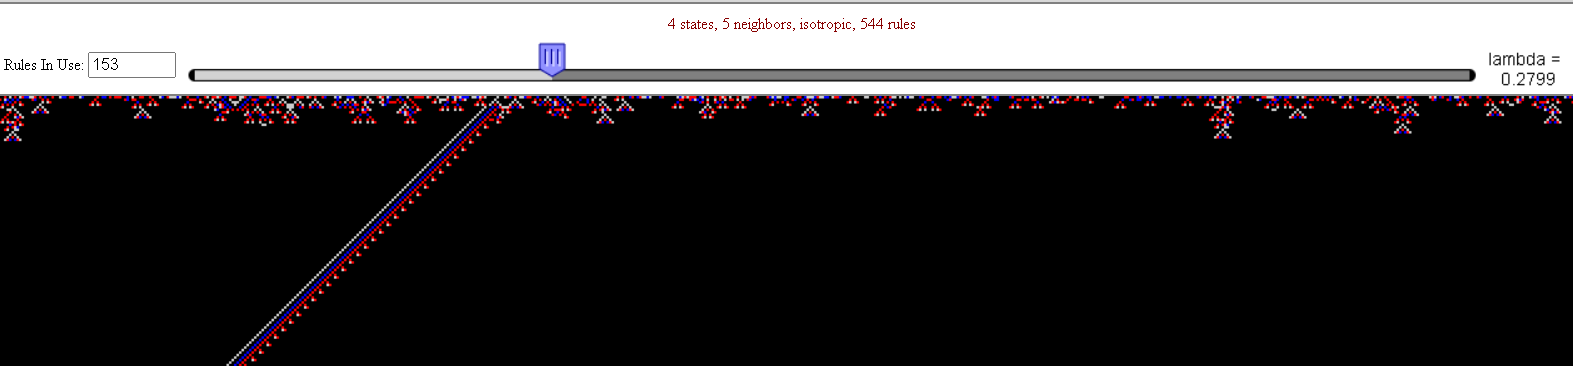

to najmniejsza lambda jaka dala nieumierajacy uklad. Nie jest natomiast chaotyczny

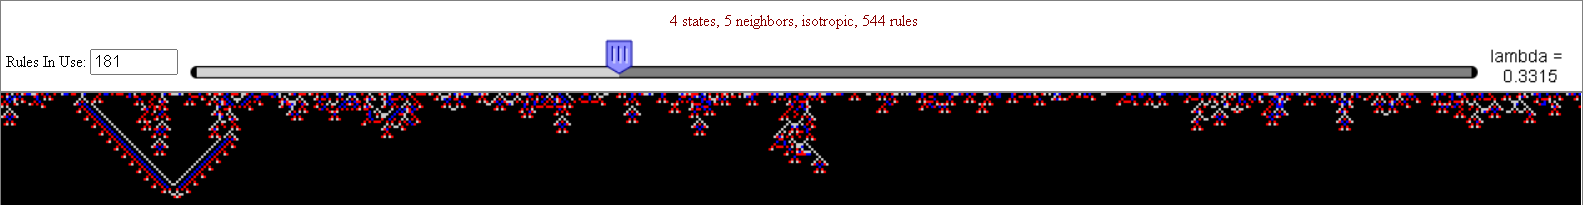

dla wiekszych lambda pokazywalo sie wiecej odnog idacych w nieskonczonosc. W wypadku jak powyzszy kiedy sie zdezaja ciag sie konczy. inaczej ida rownolegle w nieskonczonoscsc  

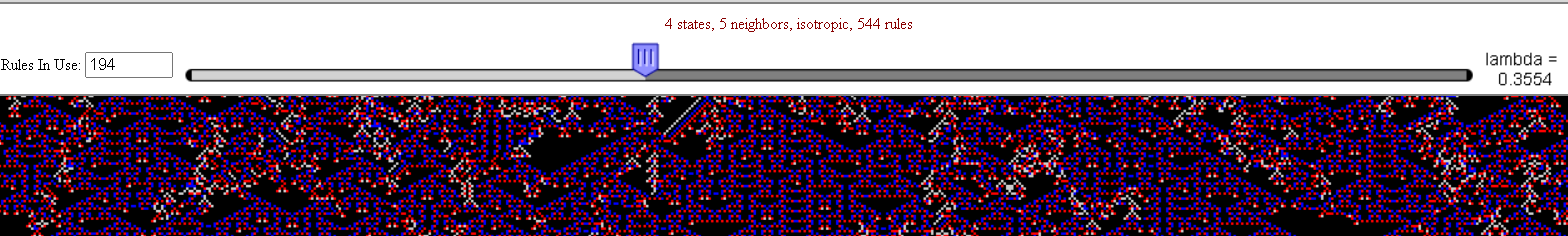

tutaj pierwszy ladny chaos

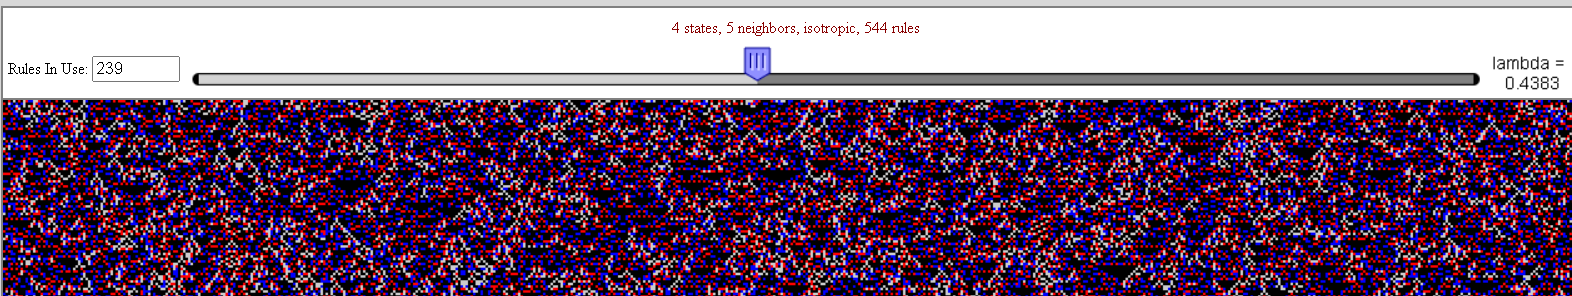

tutaj ladne malutkie drzewka.

idac dalej robi sie juz praktycznie szum

### b) Policz miary złożoności dla krytycznych lambda dla różnych k i n. Wyniki przedstaw w tabelach k-n.
 Pomóż sobie: https://github.com/lantunes/cellpylib.


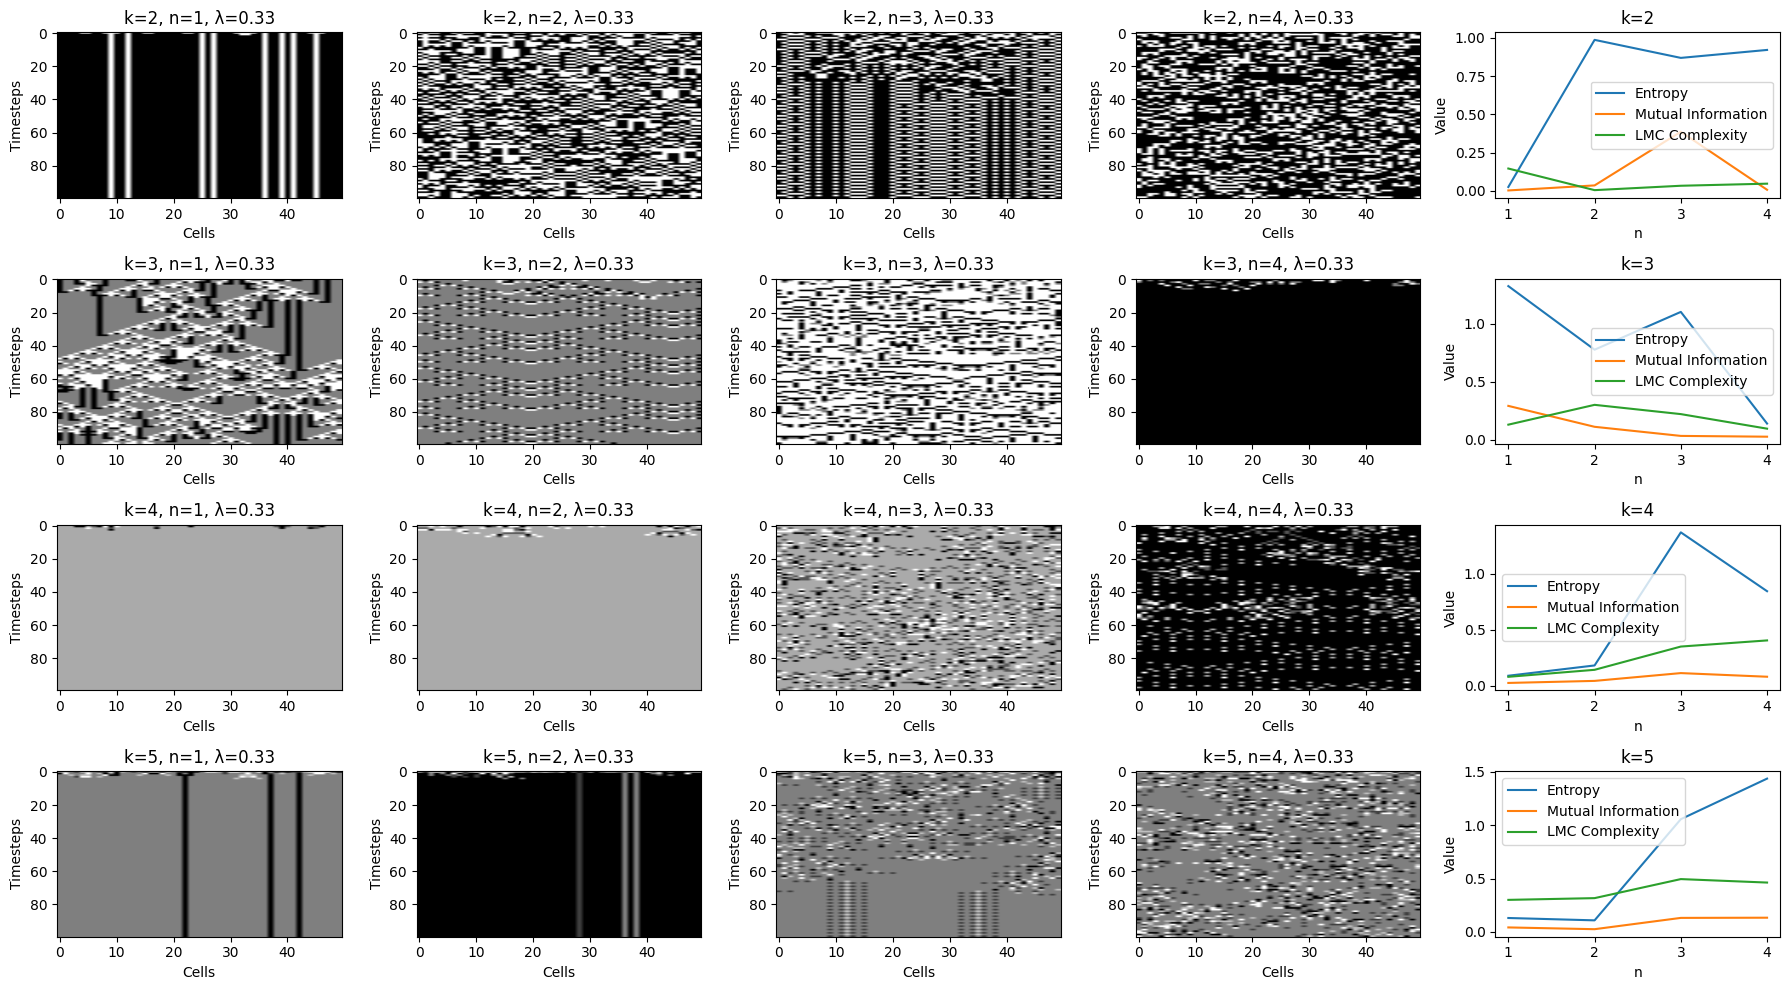

    k  n  lambda_c   Entropy  Mutual Information  LMC Complexity
0   2  1      0.33  0.025048            0.002450        0.145629
1   2  2      0.33  0.986230            0.035282        0.004427
2   2  3      0.33  0.868452            0.385950        0.033075
3   2  4      0.33  0.920420            0.006808        0.046701
4   3  1      0.33  1.324601            0.292814        0.131122
5   3  2      0.33  0.776980            0.112652        0.301833
6   3  3      0.33  1.102450            0.034191        0.221984
7   3  4      0.33  0.140585            0.027437        0.096595
8   4  1      0.33  0.090306            0.025946        0.080628
9   4  2      0.33  0.182206            0.044255        0.143167
10  4  3      0.33  1.370718            0.113886        0.350916
11  4  4      0.33  0.845223            0.081380        0.405644
12  5  1      0.33  0.131156            0.042812        0.300991
13  5  2      0.33  0.109091            0.026236        0.317346
14  5  3      0.33  1.057

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def evolve_compute_complexity_metrics(k, n, lambda_c, size=50, timesteps=100):
    rule_table, actual_lambda, quiescent_state = cpl.random_rule_table(lambda_val=lambda_c, k=k, r=n,
                                                                       strong_quiescence=True,
                                                                       isotropic=True)
    cellular_automaton = cpl.init_random(size, k=k)
    
    cellular_automaton = cpl.evolve(
        cellular_automaton,
        timesteps=timesteps,
        apply_rule=lambda n, c, t: cpl.table_rule(n, rule_table), r=n
    )
    
    entropy = cpl.average_cell_entropy(cellular_automaton)
    mutual_inf = cpl.average_mutual_information(cellular_automaton)
    binary_sequence = cellular_automaton.flatten()
    lmc = calculate_lmc_complexity(binary_sequence)
    
    return cellular_automaton, entropy, mutual_inf, lmc

# Zakres wartości k i n
k_values = [2, 3, 4, 5]
n_values = [1, 2, 3, 4]

# Inicjalizacja tabeli wyników
results = []
num_plots = len(k_values) * len(n_values)
fig, axes = plt.subplots(len(k_values), len(n_values) + 1, figsize=(18, 10))

for i, k in enumerate(k_values):
    entr_values = []
    mutual_inf_values = []
    lmc_values = []
    
    for j, n in enumerate(n_values):
        lambda_c = 0.33
        cellular_automaton, entropy, mutual_inf, lmc = evolve_compute_complexity_metrics(k, n, lambda_c)
        results.append((k, n, lambda_c, entropy, mutual_inf, lmc))
        
        entr_values.append(entropy)
        mutual_inf_values.append(mutual_inf)
        lmc_values.append(lmc)
        
        # Rysowanie ewolucji automatu w subplotach
        ax = axes[i, j]
        ax.imshow(cellular_automaton, cmap="binary", aspect="auto")
        ax.set_title(f"k={k}, n={n}, λ={lambda_c:.2f}")
        ax.set_xlabel("Cells")
        ax.set_ylabel("Timesteps")
    
    # Rysowanie metryk w ostatnim subplot
    ax = axes[i, -1]
    ax.plot(n_values, entr_values, label="Entropy")
    ax.plot(n_values, mutual_inf_values, label="Mutual Information")
    ax.plot(n_values, lmc_values, label="LMC Complexity")
    ax.set_title(f"k={k}")
    ax.set_xlabel("n")
    ax.legend()
    ax.set_ylabel("Value")
    
    
plt.tight_layout()
plt.show()

# Konwersja do DataFrame i wyświetlenie
results_df = pd.DataFrame(results, columns=["k", "n", "lambda_c", "Entropy", "Mutual Information", "LMC Complexity"])
print(results_df)



### c) Sformułuj wnioski. 



jako lambda do testow obralem 0.33. Ciezko okreslic specjalnie co sie dzieje na tych wykresach. Bedac na granicy chaosu zmiana w 1 badz druga strone mocno zmienia dynamike ukladu.

## ZADANIE. 3

### a) Zrób to samo dla automatu ciągłego https://cellpylib.org/continuous.html.  z tym, że zastosuj regułę logistyczną: xi= lambda * xi_* (1-xi_), gdzie xi stan automatu na pozycji i, xi_ → średnia ze stanów sąsiednich.



### b) Zrobić to dla różnej wielkości sąsiedztwa n. Wartości xi są z przedziału [0,1] i są liczbami rzeczywistymi.




### d) Policz miary złożoności tam, gdzie to ci się wydaje potrzebne.


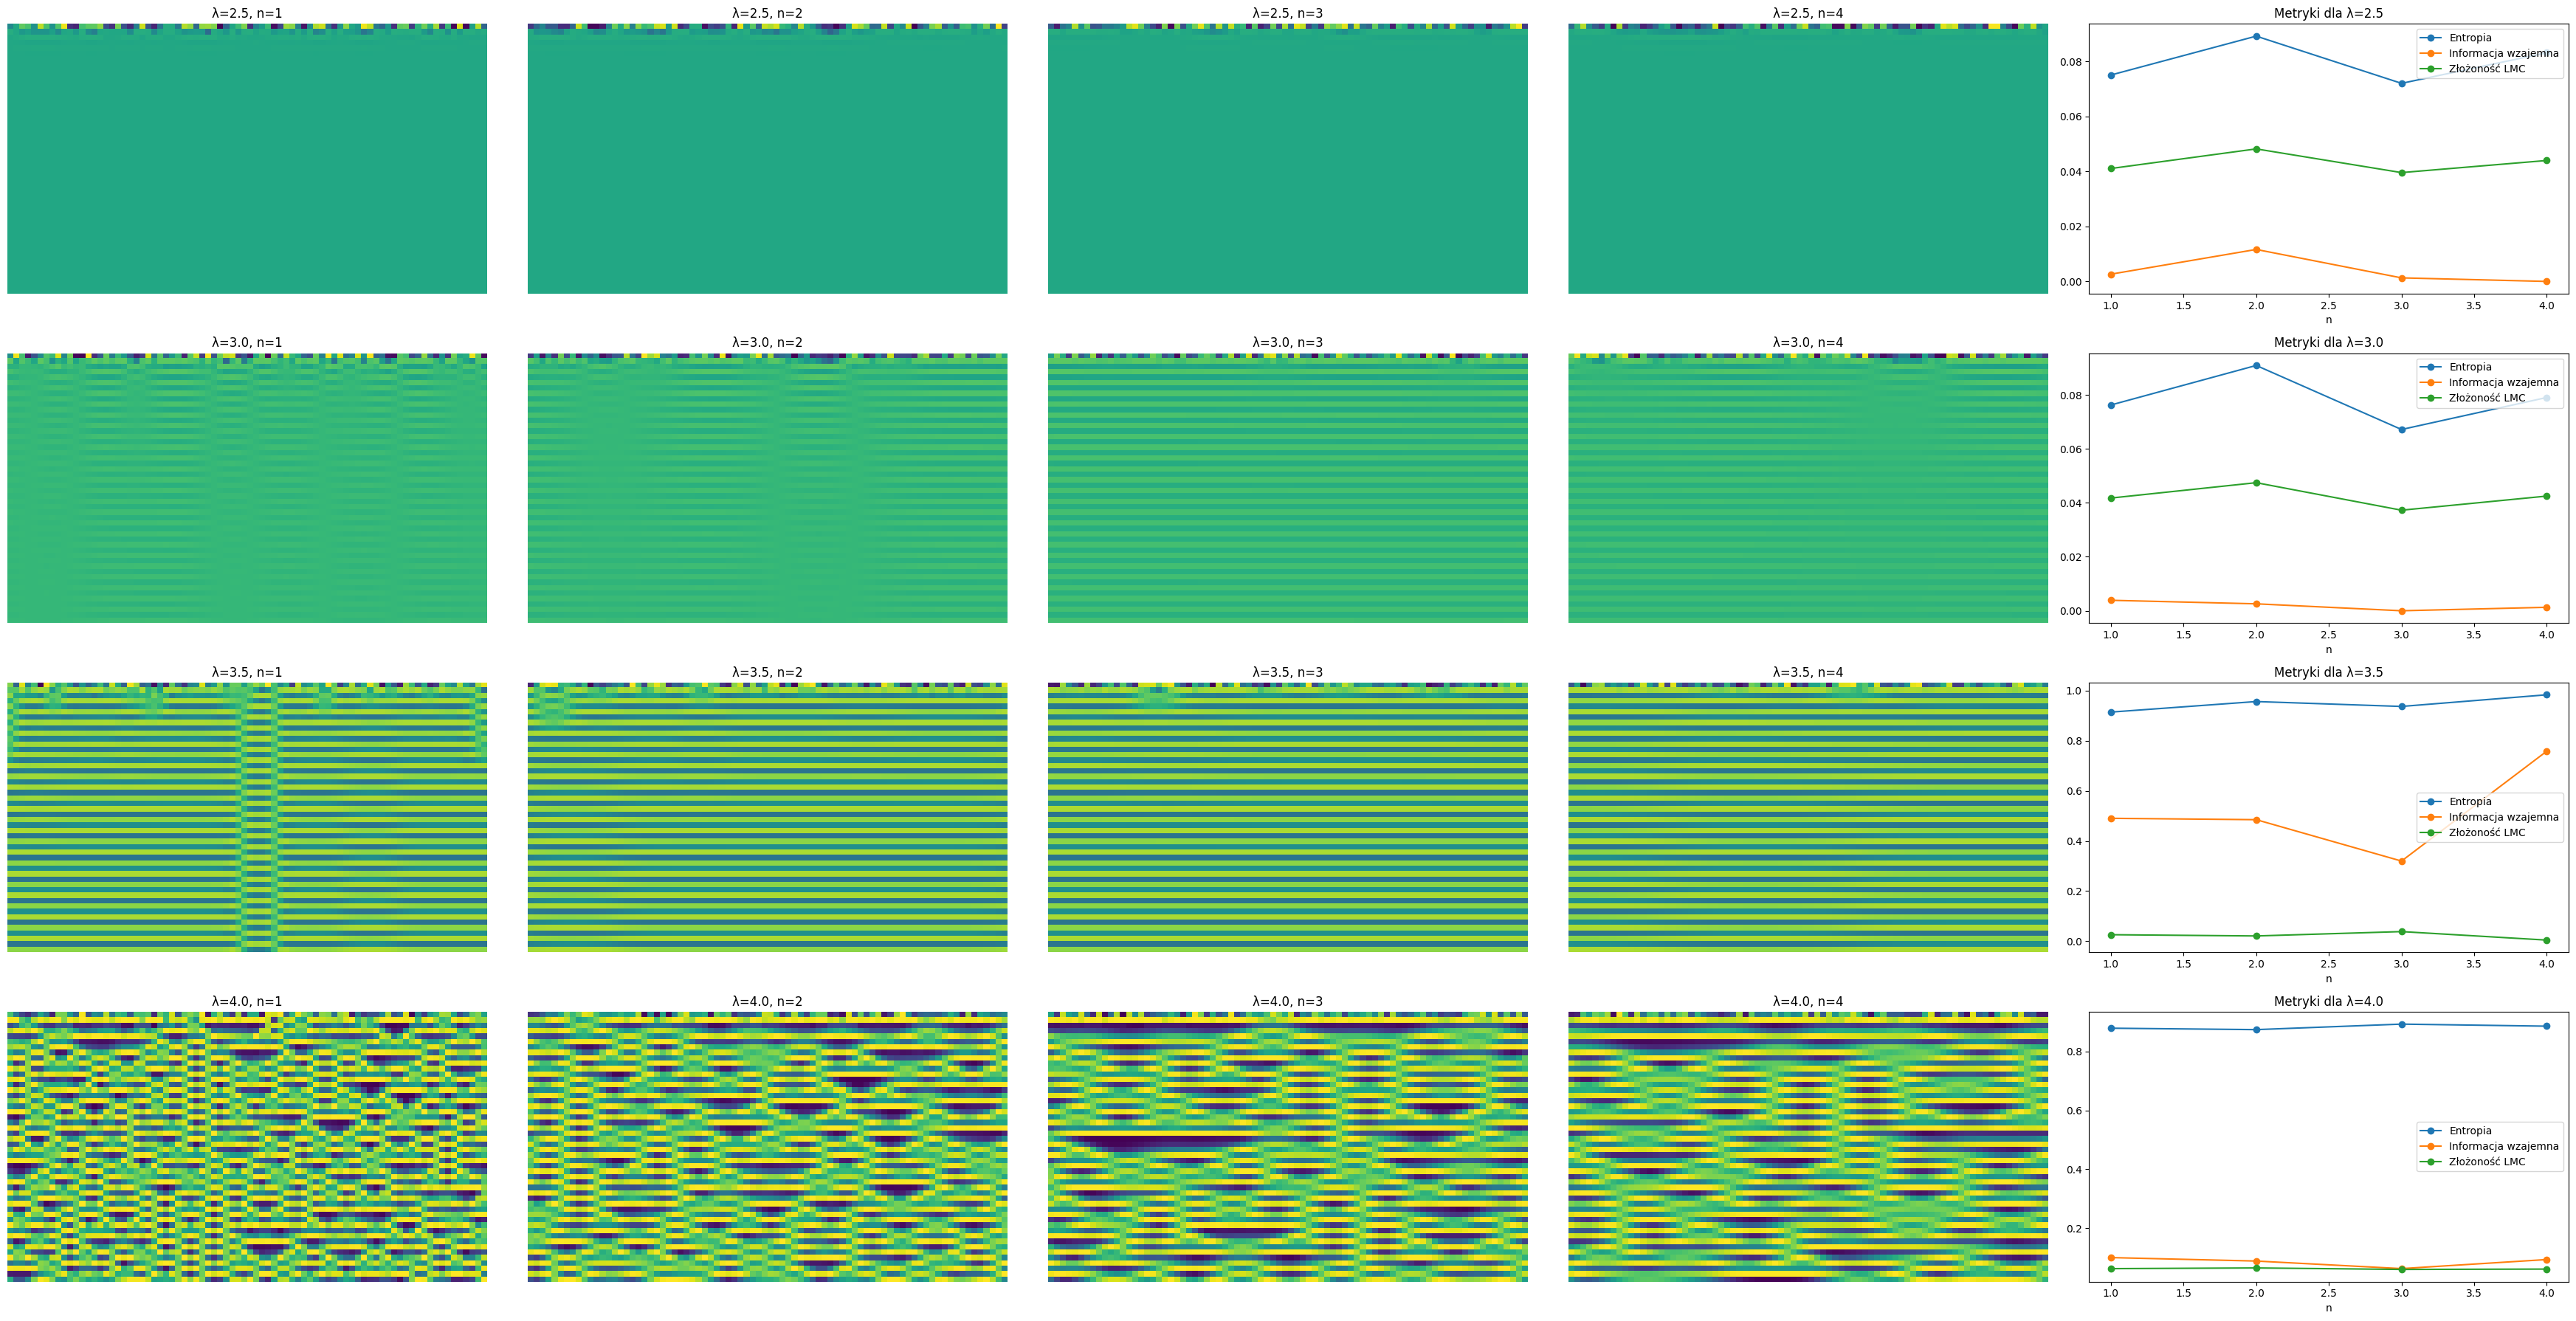

    Lambda  n  Entropia  Informacja Wzajemna  Złożoność LMC
0      2.5  1  0.075010             0.002642       0.041039
1      2.5  2  0.089138             0.011623       0.048162
2      2.5  3  0.071981             0.001294       0.039550
3      2.5  4  0.083096             0.000000       0.043951
4      3.0  1  0.076270             0.003882       0.041775
5      3.0  2  0.090922             0.002573       0.047473
6      3.0  3  0.067184             0.000000       0.037272
7      3.0  4  0.079053             0.001286       0.042506
8      3.5  1  0.914609             0.490413       0.025644
9      3.5  2  0.956714             0.484997       0.020661
10     3.5  3  0.937133             0.319738       0.038074
11     3.5  4  0.983702             0.758648       0.004161
12     4.0  1  0.879359             0.099661       0.062116
13     4.0  2  0.874559             0.087926       0.064487
14     4.0  3  0.893292             0.062263       0.059477
15     4.0  4  0.886290             0.09

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cellpylib as cpl

def logistic_rule(neighborhood, cell_idx, t, lambda_val):
    avg = np.mean(neighborhood)
    new_state = lambda_val * avg * (1 - avg)
    return np.clip(new_state, 0, 1)  # Ogranicz wartości do przedziału [0, 1]

def evolve_compute_complexity_metrics(lambda_val, n, size=80, timesteps=50):
    # Inicjalizacja ciągłego automatu z losowymi stanami (typ float64)
    cellular_automaton = cpl.init_random(size, k=2, dtype=np.float64)
    
    # Ewolucja automatu z regułą logistyczną
    cellular_automaton = cpl.evolve(
        cellular_automaton,
        timesteps=timesteps,
        apply_rule=lambda n, c, t: logistic_rule(n, c, t, lambda_val),
        r=n  # promień sąsiedztwa
    )
    
    # Dyskretyzacja do postaci binarnej (dla metryk)
    binary_ca = (cellular_automaton >= 0.5).astype(int)
    
    # Obliczanie metryk
    entropy = cpl.average_cell_entropy(binary_ca)
    mutual_inf = cpl.average_mutual_information(binary_ca)
    binary_sequence = binary_ca.flatten()
    lmc = calculate_lmc_complexity(binary_sequence)
    
    return cellular_automaton, entropy, mutual_inf, lmc

# Zakres parametrów
lambda_values = [2.5, 3.0, 3.5, 4.0]
n_values = [1, 2, 3, 4]

# Przygotowanie wykresów
fig, axes = plt.subplots(len(lambda_values), len(n_values) + 1, figsize=(35, 18))
results = []

for i, lambda_val in enumerate(lambda_values):
    entropy_list = []
    mutual_info_list = []
    lmc_list = []
    
    for j, n in enumerate(n_values):
        ca, entropy, mutual_info, lmc = evolve_compute_complexity_metrics(lambda_val, n)
        results.append((lambda_val, n, entropy, mutual_info, lmc))
        
        entropy_list.append(entropy)
        mutual_info_list.append(mutual_info)
        lmc_list.append(lmc)
        
        # Wizualizacja automatu
        ax = axes[i, j]
        ax.imshow(ca, cmap="viridis", aspect="auto", vmin=0, vmax=1)
        ax.set_title(f"λ={lambda_val}, n={n}")
        ax.axis('off')
    
    # Wykres metryk
    ax = axes[i, -1]
    ax.plot(n_values, entropy_list, marker='o', label='Entropia')
    ax.plot(n_values, mutual_info_list, marker='o', label='Informacja wzajemna')
    ax.plot(n_values, lmc_list, marker='o', label='Złożoność LMC')
    ax.set_title(f"Metryki dla λ={lambda_val}")
    ax.set_xlabel("n")
    ax.legend()
    ax.legend()

plt.tight_layout()
plt.show()

# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results, columns=["Lambda", "n", "Entropia", "Informacja Wzajemna", "Złożoność LMC"])
print(results_df)

### c) Narysuj krzywą x_= f(lambda) gdzie x_ jest średnią po całej tablicy.


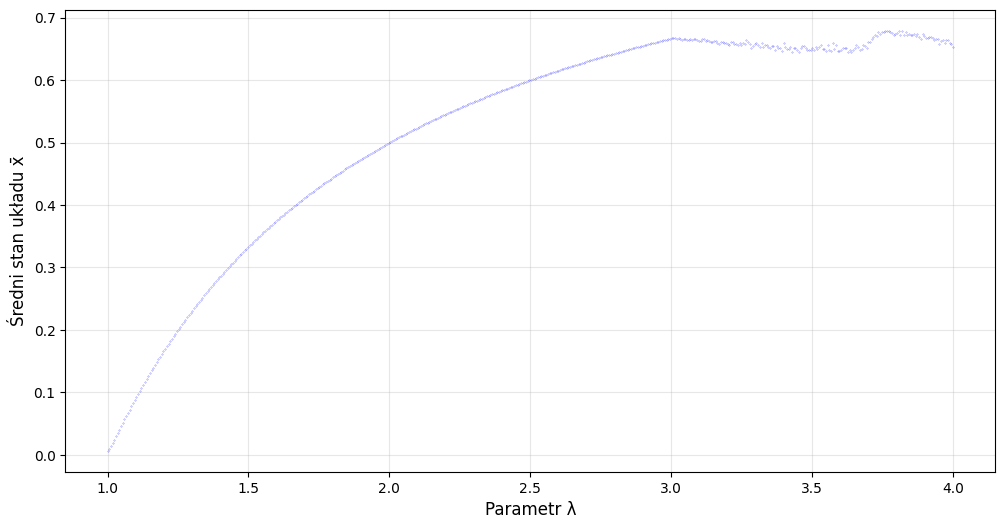

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cellpylib as cpl

# Parametry symulacji
size = 100       # liczba komórek
timesteps = 200  # liczba kroków czasowych
discard = 100    # kroki do odrzucenia (transient)
n = 1            # promień sąsiedztwa

def logistic_rule(neighborhood, cell_idx, t, lambda_val):
    """Reguła logistyczna zależna od parametru lambda"""
    avg = np.mean(neighborhood)
    new_state = lambda_val * avg * (1 - avg)
    return np.clip(new_state, 0, 1)  # ograniczenie do [0, 1]

# Zakres wartości lambda
lambda_values = np.linspace(1.0, 4.0, 500)
x_means = []

for lambda_val in lambda_values:
    # Inicjalizacja losowego stanu początkowego
    ca = cpl.init_random(size, k=2, dtype=np.float64)
    
    # Ewolucja automatu
    ca = cpl.evolve(
        ca,
        timesteps=timesteps,
        apply_rule=lambda nhood, c, t: logistic_rule(nhood, c, t, lambda_val),
        r=n
    )
    
    # Obliczanie średniej po odrzuceniu początkowych kroków
    steady_state = ca[discard:]
    x_means.append(np.mean(steady_state))

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(lambda_values, x_means, 'b.', markersize=0.5, alpha=0.6)
plt.xlabel("Parametr λ", fontsize=12)
plt.ylabel("Średni stan układu x̄", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


### e) Sformułuj wnioski.

z pierwszych wykresow wynika, ze dopiero przy lambda 4.0 mamy chaos.
Wykres pokazuje monotonny wzrost logarytmiczny z fluktuacjami od 3.0. To jest punkt, gdzie zaczynaja sie ksztalty inne niz zwykle poziome linie i komorki zaczynaja na siebie oddzialowywac 

Dla wystarczajaco duzej lambdy uklad nie zanika a zarazem dochodzi do bardziej zlozonych ukladow.

co ciekawe w metrykach dla lambdy 4 entropia jest dominujacym czynnikiem